<a href="https://colab.research.google.com/github/anacsalves/easyfield/blob/main/easyfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

In [ ]:
meses = [
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2009_Jan/048480/Plumes_O048480-B082-SPWR02.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Feb/043247/Plumes_O043247-B058-SPWR04.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Mar/043684/Plumes_O043684-B050-SPWR02.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Apr/044078/Plumes_O044078-B073-SPWR03.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_May/044523/Plumes_O044523-B074-SPWR01.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Jun/045100/Plumes_O045100-B099-SPWR02.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Jul/045434/Plumes_O045434-B103-SPWR01.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Aug/045857/Plumes_O045857-B095-SPWR05.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Sep/046309/Plumes_O046309-B094-SPWR01.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Oct/046985/Plumes_O046985-B056-SPWR02.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Nov/047202/Plumes_O047202-B064-SPWR01.txt",
    "https://asdc.larc.nasa.gov/documents/misr/plume/Global-2008_Dec/047663/Plumes_O047663-B084-SPWB05.txt"
]

In [ ]:
longitudes = []
latitudes = []
heat = []

for mes in meses:
    # name of file
    arquivo_txt = str(requests.get(mes).content)
    linhas = arquivo_txt.split('\\n')

    # Process each line of the file
    for linha in linhas:
        partes = linha.split(":")
        if partes[0].startswith('First point longitude'): longitudes.append(float(partes[1]))
        if partes[0].startswith('First point latitude'): latitudes.append(float(partes[1]))
        if partes[0].startswith('Total fire power (MW)'): heat.append(float(partes[1]))


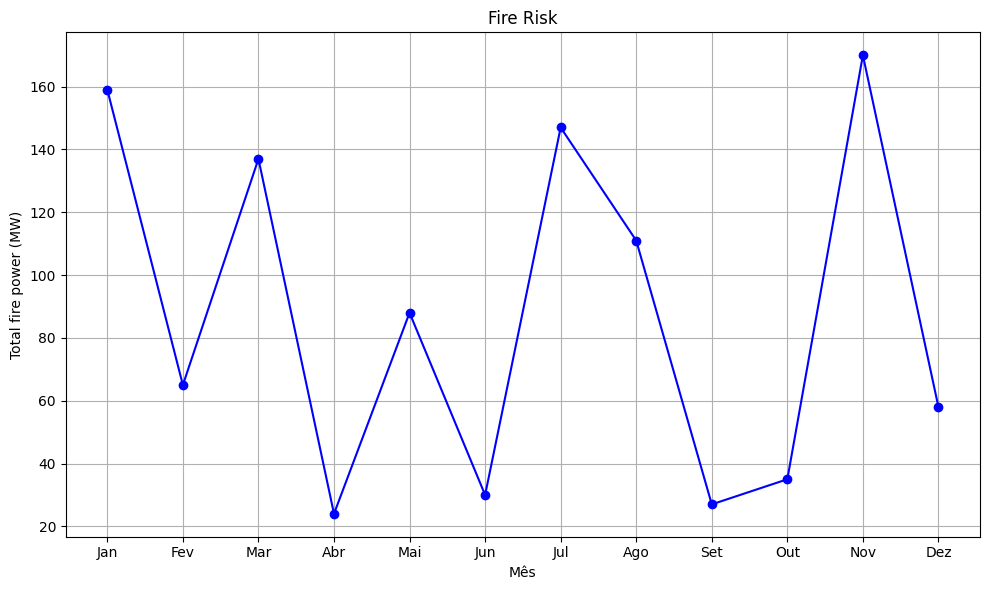

In [ ]:
# Create a chart
m = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
plt.figure(figsize=(10, 6))
plt.plot(m, heat, marker='o', linestyle='-', color='b')

plt.xlabel("Mês")
plt.ylabel("Total fire power (MW)")
plt.title("Fire Risk")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Load the pre-trained model and tokenizer
model_name = "bert-base-uncased"  # Change to the desired model
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers.trainer_utils import number_of_arguments
from transformers import pipeline

mensages = []

if heat[11] > 60 :
  input_text = 'High risk of fire in your region, '
else :
  input_text = 'Low risk of fire in your region, '

generator = pipeline(model="distilgpt2")
mensages.append(generator(
    input_text,
    max_length=30
))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Low risk of fire in your region, ???\n\n\n\nSo you could also use the data as an example like you do in this post'}]


In [ ]:
# sending automatic messages
import pywhatkit
import keyboard
import time
from datetime import datetime


contatos = [number]

while len(contatos) >= 1:
    pywhatkit.sendwhatmsg(contatos[0], mensages[0], datetime.now().hour, datetime.now().
    minute + 2)
    del contatos[0]
    time.sleep(10)
    keyboard.press_and_release('ctrl + w')

ModuleNotFoundError: ignored